In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder  

import os

In [87]:
df = pd.read_csv('./dataset/preprocessed_titanic.csv')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True


In [88]:
# making family size feature
df['family_size'] = df['sibsp'] + df['parch'] +1
# is alone feature
df['is_alone'] = (df['family_size'] == 1).astype(int)

# binning age
df['age_group'] =pd.cut(df['age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])

# fare per person
df['fare_per_person'] = df['fare'] / df['family_size']
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,is_alone,age_group,fare_per_person
0,0.0,3.0,male,22.000000,1.0,0.0,7.2500,S,Third,man,True,C,Southampton,no,False,2.0,0,Adult,3.62500
1,1.0,1.0,female,38.000000,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0,0,Adult,35.64165
2,1.0,3.0,female,26.000000,0.0,0.0,7.9250,S,Third,woman,False,C,Southampton,yes,True,1.0,1,Adult,7.92500
3,1.0,1.0,female,35.000000,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0,0,Adult,26.55000
4,0.0,3.0,male,35.000000,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True,1.0,1,Adult,8.05000
5,0.0,3.0,male,29.699118,0.0,0.0,8.4583,Q,Third,man,True,C,Queenstown,no,True,1.0,1,Adult,8.45830
6,0.0,1.0,male,54.000000,0.0,0.0,51.8625,S,First,man,True,E,Southampton,no,True,1.0,1,Adult,51.86250
7,0.0,3.0,male,2.500000,3.0,1.0,21.0750,S,Third,child,False,C,Southampton,no,False,5.0,0,Child,4.21500
8,1.0,3.0,female,27.000000,0.0,2.0,11.1333,S,Third,woman,False,C,Southampton,yes,False,3.0,0,Adult,3.71110
9,1.0,2.0,female,14.000000,1.0,0.0,30.0708,C,Second,child,False,C,Cherbourg,yes,False,2.0,0,Teen,15.03540


In [89]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'family_size', 'is_alone', 'age_group',
       'fare_per_person'],
      dtype='object')

In [90]:
# Encoding
# One-hot encoding for embarked
df = pd.get_dummies(df, columns=['embarked'], prefix='embarked')

# Label encoding for sex
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,...,embark_town,alive,alone,family_size,is_alone,age_group,fare_per_person,embarked_C,embarked_Q,embarked_S
0,0.0,3.0,1,22.0,1.0,0.0,7.2500,Third,man,True,...,Southampton,no,False,2.0,0,Adult,3.62500,False,False,True
1,1.0,1.0,0,38.0,1.0,0.0,71.2833,First,woman,False,...,Cherbourg,yes,False,2.0,0,Adult,35.64165,True,False,False
2,1.0,3.0,0,26.0,0.0,0.0,7.9250,Third,woman,False,...,Southampton,yes,True,1.0,1,Adult,7.92500,False,False,True
3,1.0,1.0,0,35.0,1.0,0.0,53.1000,First,woman,False,...,Southampton,yes,False,2.0,0,Adult,26.55000,False,False,True
4,0.0,3.0,1,35.0,0.0,0.0,8.0500,Third,man,True,...,Southampton,no,True,1.0,1,Adult,8.05000,False,False,True


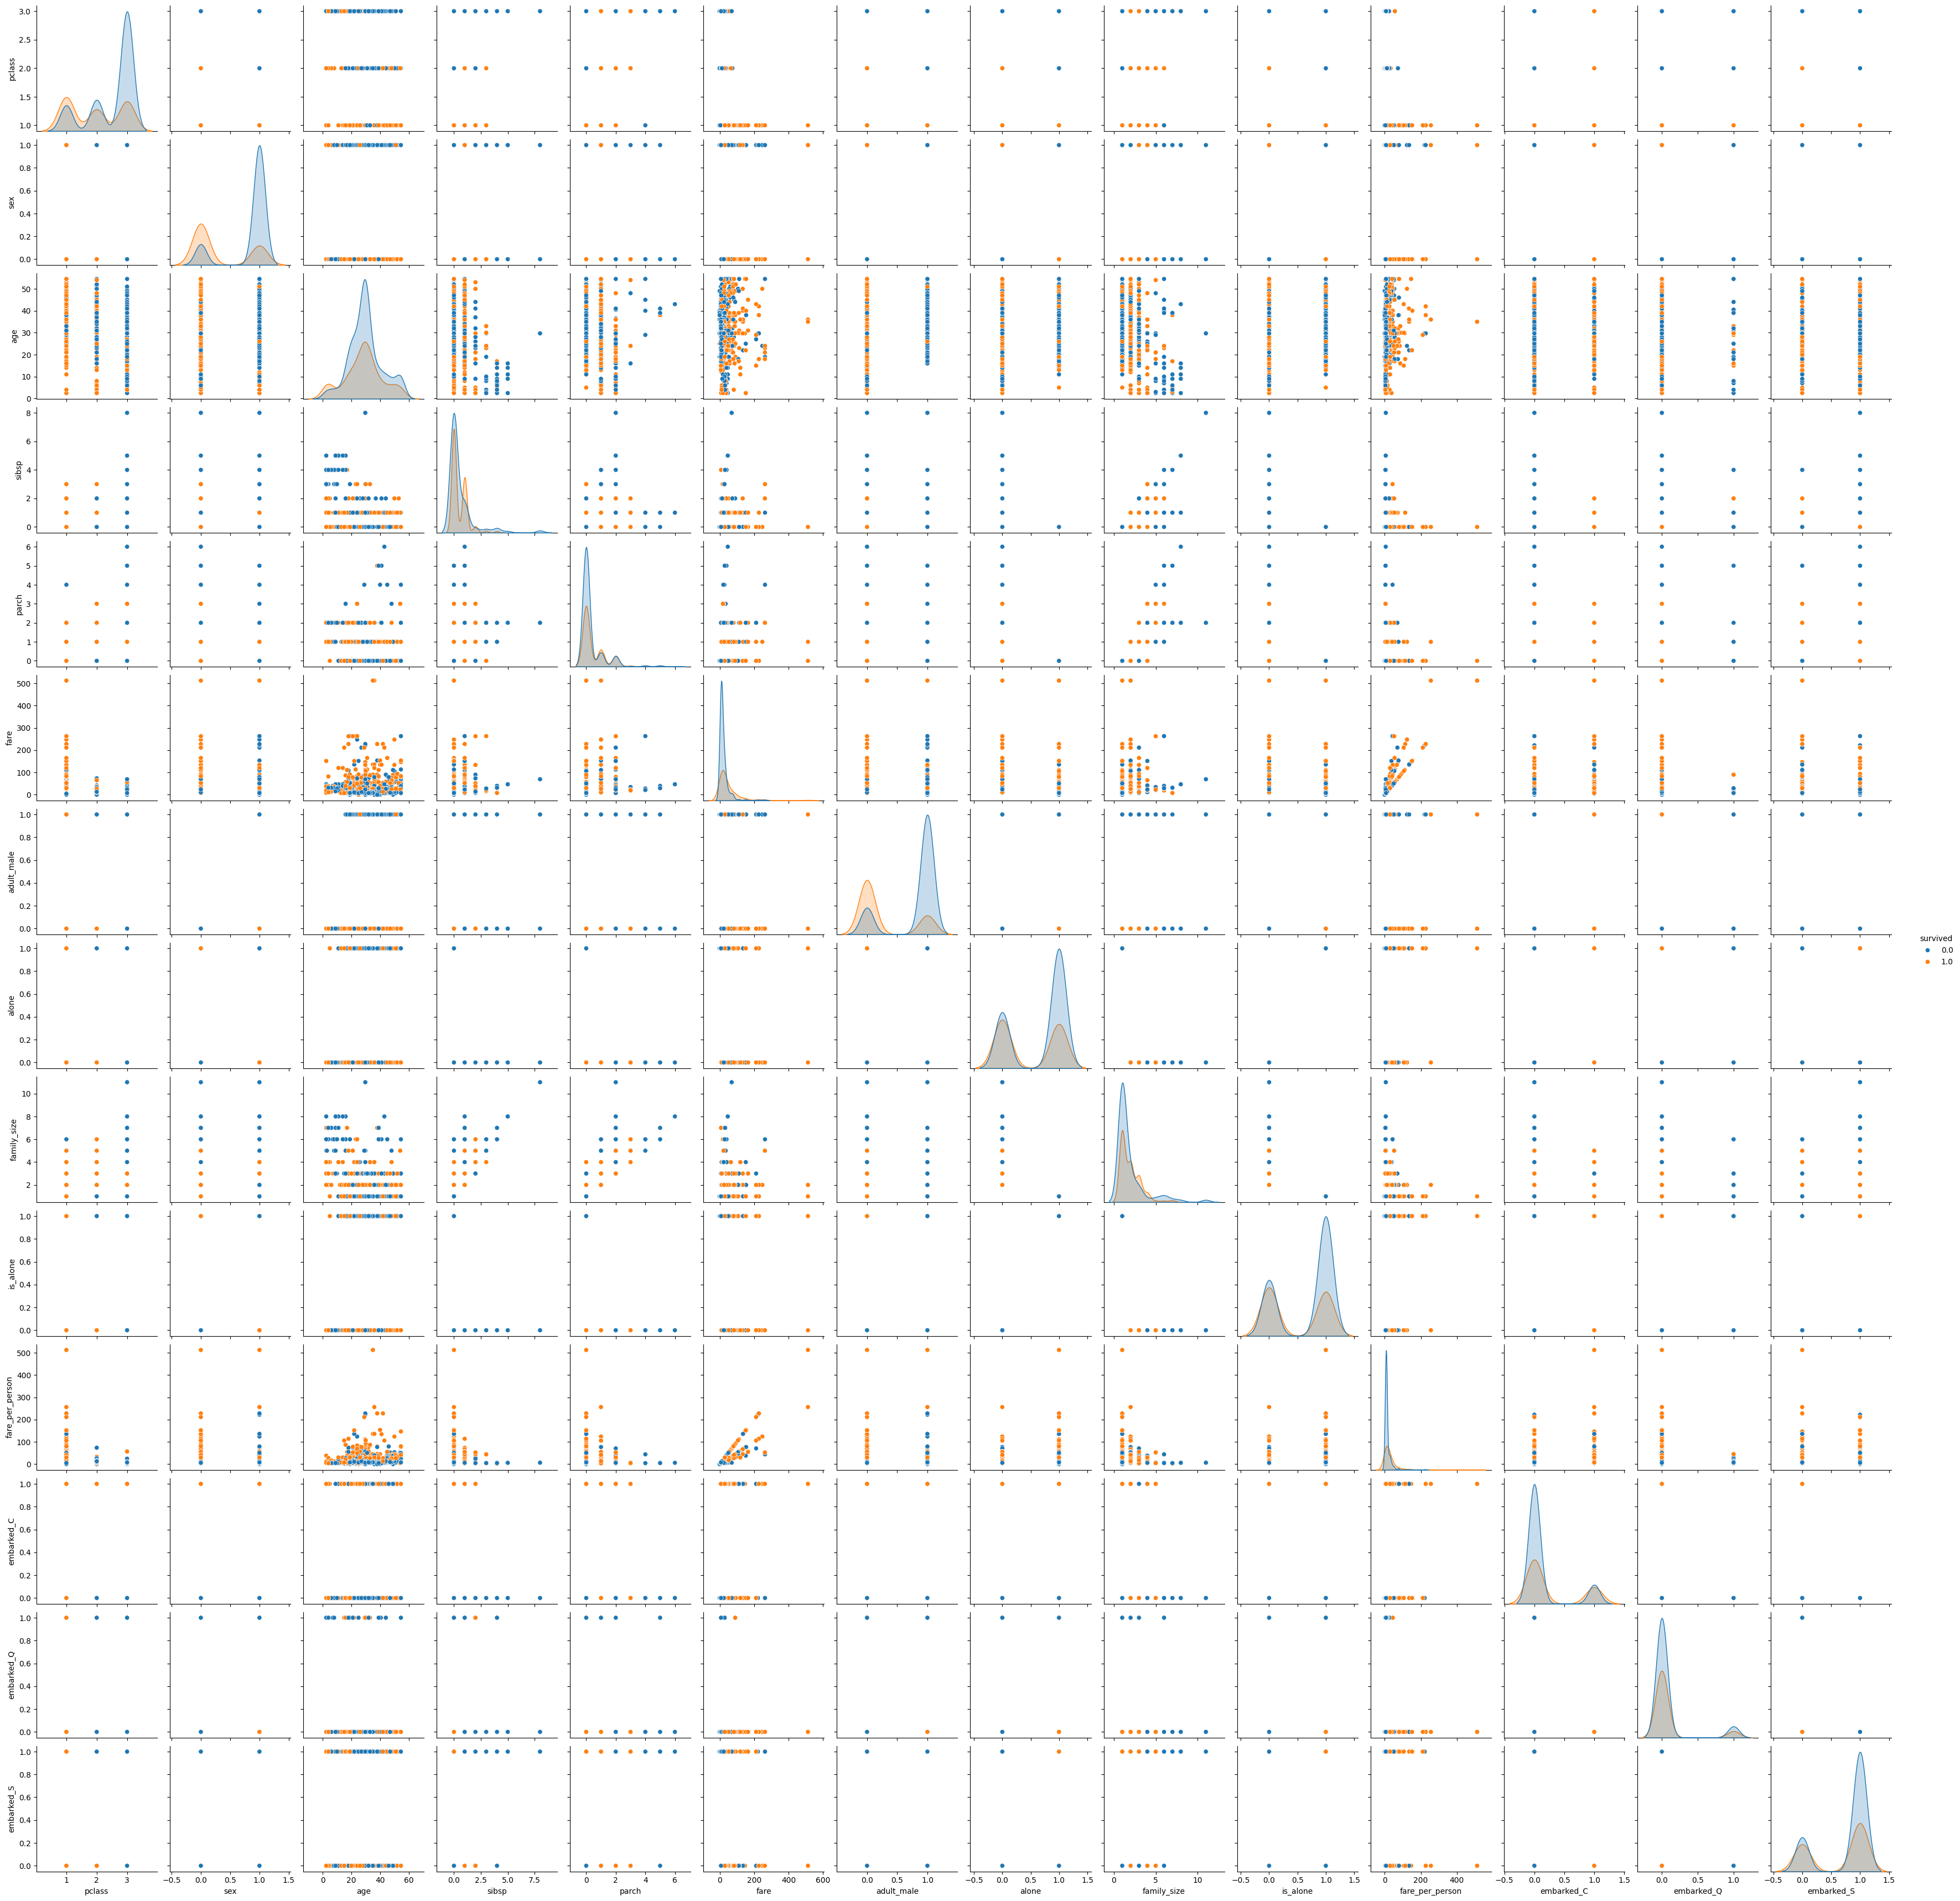

In [91]:
sns.pairplot(df, hue='survived')
plt.show()

In [ ]:
# one hot encoding on non numerical features to avoid error for visualizing heatmap
# Label Encoding for ordinal or binary variables
label_cols = ['sex', 'pclass', 'age_group']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['who'])

In [98]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,deck,...,family_size,is_alone,age_group,fare_per_person,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0.0,2,1,22.0,1.0,0.0,7.2500,Third,True,C,...,2.0,0,0,3.62500,False,False,True,False,True,False
1,1.0,0,0,38.0,1.0,0.0,71.2833,First,False,C,...,2.0,0,0,35.64165,True,False,False,False,False,True
2,1.0,2,0,26.0,0.0,0.0,7.9250,Third,False,C,...,1.0,1,0,7.92500,False,False,True,False,False,True
3,1.0,0,0,35.0,1.0,0.0,53.1000,First,False,C,...,2.0,0,0,26.55000,False,False,True,False,False,True
4,0.0,2,1,35.0,0.0,0.0,8.0500,Third,True,C,...,1.0,1,0,8.05000,False,False,True,False,True,False


In [102]:
df_corr = df.drop(['class', 'deck', 'embark_town', 'alive'], axis=1)

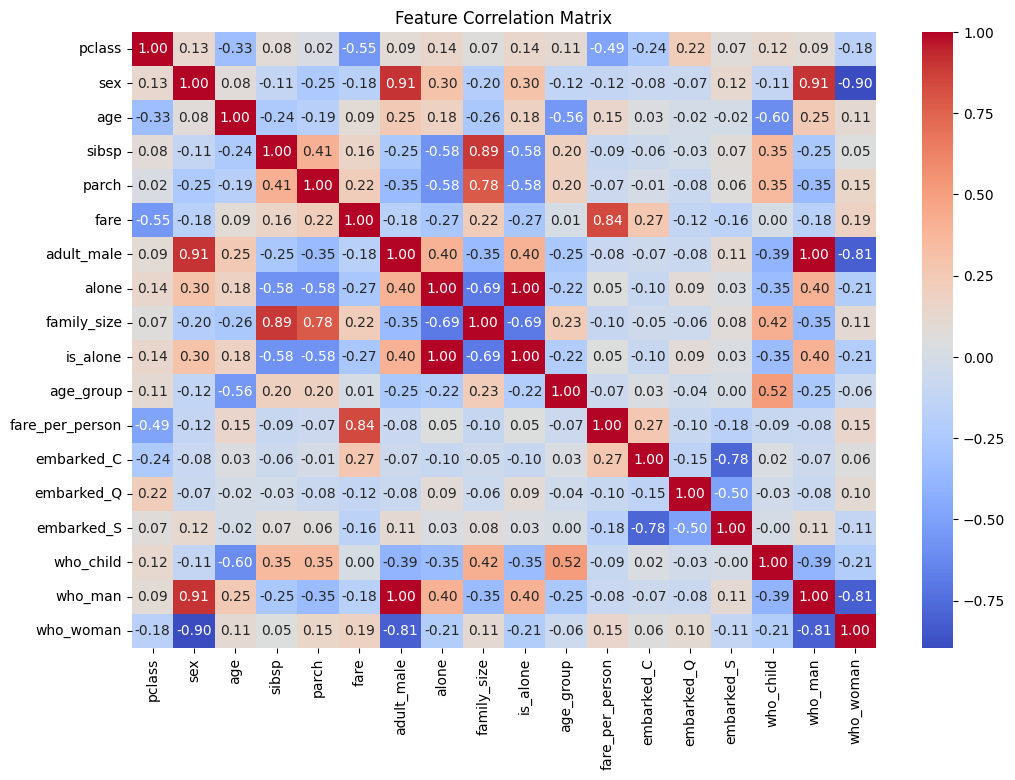

In [103]:
corr = df_corr.iloc[:, 1:].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_18140\3324821618.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='family_size', y='survived', data=df, ci=None)


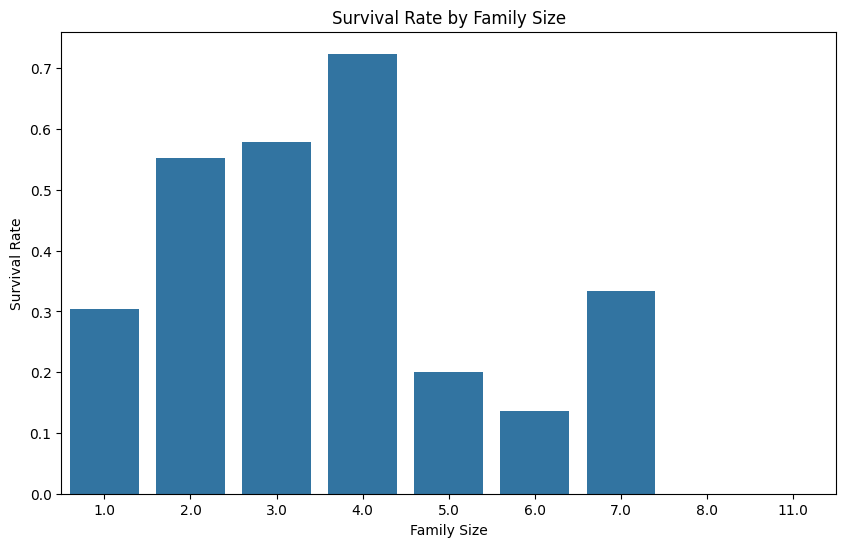

In [104]:
# Plot survival rate by family size
plt.figure(figsize=(10, 6))
sns.barplot(x='family_size', y='survived', data=df, ci=None)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


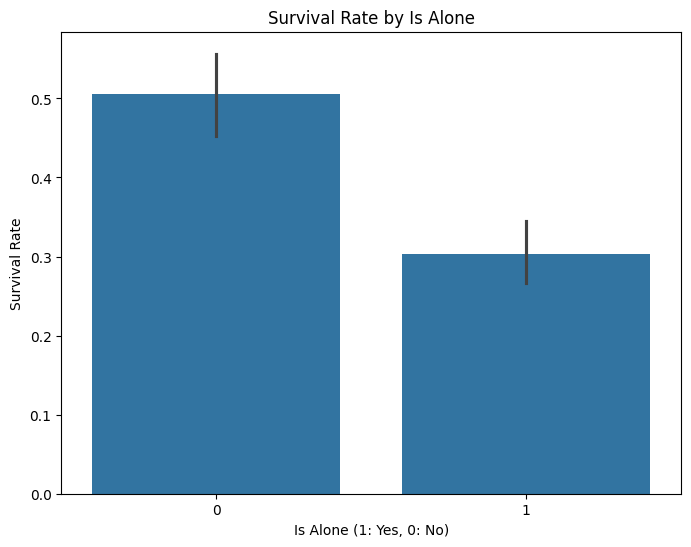

In [105]:
# Plot survival rate by "Is Alone" feature
plt.figure(figsize=(8, 6))
sns.barplot(x='is_alone', y='survived', data=df)
plt.title('Survival Rate by Is Alone')
plt.xlabel('Is Alone (1: Yes, 0: No)')
plt.ylabel('Survival Rate')
plt.show()


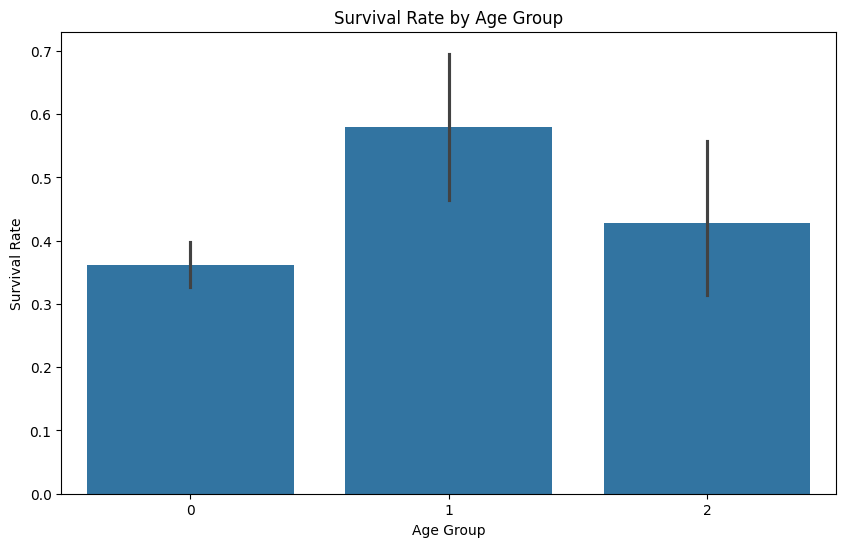

In [107]:
# Plot survival rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='survived', data=df)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

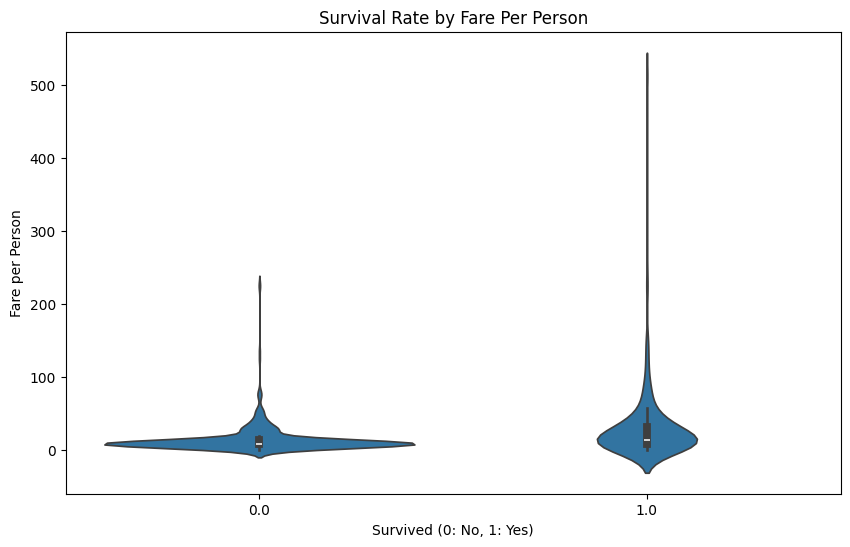

In [108]:
# Plot survival rate by fare per person
plt.figure(figsize=(10, 6))
sns.violinplot(x='survived', y='fare_per_person', data=df)
plt.title('Survival Rate by Fare Per Person')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Fare per Person')
plt.show()

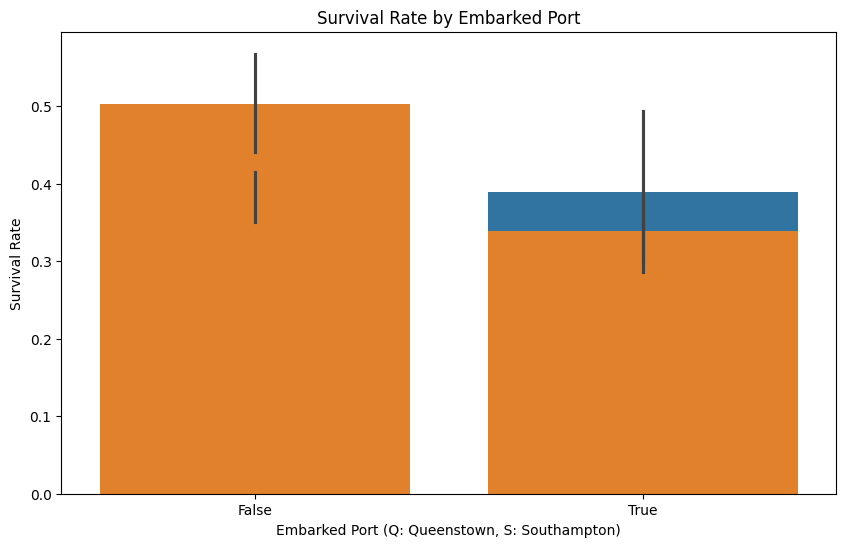

In [109]:
# Plot survival rate by embarkation point
plt.figure(figsize=(10, 6))
sns.barplot(x='embarked_Q', y='survived', data=df)
sns.barplot(x='embarked_S', y='survived', data=df)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port (Q: Queenstown, S: Southampton)')
plt.ylabel('Survival Rate')
plt.show()